In [22]:
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import CategoricalNB, MultinomialNB
from sklearn.tree import export_graphviz
from sklearn.metrics import *
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import LabelEncoder
import numpy as np 

In [23]:
df=pd.read_csv('3425_data.csv')

In [24]:
df.shape

(2054, 103)

In [25]:
df.columns

Index(['SRCID', 'Mode', 'Q1', 'Q2', 'nominal Q2', 'Q3', 'Q4',
       'binary undecided voter', 'DUM1', 'DUM2',
       ...
       'Q22', 'Q23', 'Q24', 'Q25', 'p_gender_sdc', 'p_age_group_sdc',
       'p_education_sdc', 'p_state_sdc', 'StateMap', 'nominal StateMap'],
      dtype='object', length=103)

In [26]:
df.head()
pd.options.mode.chained_assignment = None  # default='warn'

In [57]:
total = 0
attri = 0
for i in df:
    total+= (df[i] == " ").sum()
    if (df[i] == " ").sum()!= 0:
        print((df[i] == " ").sum(), i)
#     else:
#         print((df[i] == " ").sum())
    attri+=1
print(total)
print(len(df['Q1']), attri)
print(total/(len(df['Q1'])*attri))
for i in df:
    print(type(df[i][0]), i)

153 Q3
846 Q14
846 Q15a
846 Q15b
846 Q15c
846 Q15d
846 Q15e
846 Q15f
846 Q15g
846 Q15h
846 Q15i
1150 Q23
1150 Q24
1338 Q25
10 p_gender_sdc
30 p_age_group_sdc
64 p_education_sdc
6 p_state_sdc
6 StateMap
12367
2054 103
0.058455677295544566
<class 'numpy.int64'> SRCID
<class 'numpy.int64'> Mode
<class 'numpy.int64'> Q1
<class 'numpy.int64'> Q2
<class 'str'> nominal Q2
<class 'str'> Q3
<class 'numpy.int64'> Q4
<class 'numpy.bool_'> binary undecided voter
<class 'numpy.int64'> DUM1
<class 'numpy.int64'> DUM2
<class 'numpy.int64'> Q5a
<class 'numpy.int64'> Q5b
<class 'numpy.int64'> Q5c
<class 'numpy.int64'> Q5d
<class 'numpy.int64'> Q5e
<class 'numpy.int64'> Q5f
<class 'numpy.int64'> Q5g
<class 'numpy.int64'> Q5h
<class 'numpy.int64'> Q5i
<class 'numpy.int64'> Q5j
<class 'numpy.int64'> Q5k
<class 'numpy.int64'> Q5m
<class 'numpy.int64'> Q6
<class 'numpy.int64'> Q7a
<class 'numpy.int64'> Q7b
<class 'numpy.int64'> Q7c
<class 'numpy.int64'> Q7d
<class 'numpy.int64'> Q7e
<class 'numpy.int64'> Q7

In [27]:
df.describe()
# df2 = df[['p_gender_sdc', 'p_age_group_sdc']]
# df2.describe()
df[['Q13_1','Q13_2','Q13_3','Q13_4','Q13_5','Q13_6','Q13_7','Q13_8','Q13_9','Q13_10','Q13_11']].sum()

Q13_1     299
Q13_2     268
Q13_3     389
Q13_4     960
Q13_5     146
Q13_6      69
Q13_7      57
Q13_8     113
Q13_9      28
Q13_10    806
Q13_11     13
dtype: int64

In [28]:
# df1 = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
# Q1 -> satisfied with Australia 1-5 98 not sure 99 prefer not to say 政党和赌博无关吧
# Q13 -> 1-11 gamble ways 12 never DK dont know REF refuse
# Q15 all except never and raffle -> a-i gamble behavior 1-4 always -> never
# Q16 opinions on gamble -> a-i 1-4 strongly agree->strongly disagree
# Q17 Australia and gamble activity -> a-d 1-4 strongly argree -> strongly disagree
# Q18 taking risks 0-10 unwilling to willing
# R1-R31 lottery
# Q20 future and something today 0-10 unwilling to willing
# s1-s31 today and future
# Q22 education
# Q23 year of highest degree
# Q24 Australian university
# Q25 HECS debt
df_gamble = df[['Q1','Q13_1','Q13_2','Q13_3',
                    'Q13_4','Q13_5','Q13_6','Q13_7','Q13_8','Q13_9','Q13_10','Q13_11','Q13_12','Q13_DK','Q13_REF',
                'Q9a','Q9b','Q9c','Q9d','Q9e',
                'Q15a','Q15b','Q15c','Q15d','Q15e','Q15f','Q15g','Q15h','Q15i',
                'Q16a','Q16b','Q16c','Q16d','Q16e','Q16f','Q16g','Q16h','Q16i','Q17a','Q17b','Q17c',
                'Q17d','Q18', 'Q20','Q22','p_gender_sdc','p_age_group_sdc','p_education_sdc','p_state_sdc'
]]
df_gamble.head()

,Q1,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,...,Q17b,Q17c,Q17d,Q18,Q20,Q22,p_gender_sdc,p_age_group_sdc,p_education_sdc,p_state_sdc
0,2,0,0,0,0,0,0,0,0,0,...,2,2,2,5,5,3,2,3,1,1
1,1,0,0,0,0,0,0,0,0,0,...,2,3,2,2,8,3,2,4,1,1
2,2,0,0,0,1,0,0,0,0,0,...,2,2,3,3,3,-98,2,3,3,1
3,2,1,0,0,0,0,0,0,0,0,...,1,4,4,9,8,1,2,4,2,1
4,4,0,1,0,1,0,0,0,0,0,...,2,3,3,6,8,1,1,2,2,1


In [29]:
df_gamble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Q1               2054 non-null   int64 
 1   Q13_1            2054 non-null   int64 
 2   Q13_2            2054 non-null   int64 
 3   Q13_3            2054 non-null   int64 
 4   Q13_4            2054 non-null   int64 
 5   Q13_5            2054 non-null   int64 
 6   Q13_6            2054 non-null   int64 
 7   Q13_7            2054 non-null   int64 
 8   Q13_8            2054 non-null   int64 
 9   Q13_9            2054 non-null   int64 
 10  Q13_10           2054 non-null   int64 
 11  Q13_11           2054 non-null   int64 
 12  Q13_12           2054 non-null   int64 
 13  Q13_DK           2054 non-null   int64 
 14  Q13_REF          2054 non-null   int64 
 15  Q9a              2054 non-null   int64 
 16  Q9b              2054 non-null   int64 
 17  Q9c              2054 non-null   

In [30]:
# df_gamble = df_gamble.dropna()

In [31]:
df_gamble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Q1               2054 non-null   int64 
 1   Q13_1            2054 non-null   int64 
 2   Q13_2            2054 non-null   int64 
 3   Q13_3            2054 non-null   int64 
 4   Q13_4            2054 non-null   int64 
 5   Q13_5            2054 non-null   int64 
 6   Q13_6            2054 non-null   int64 
 7   Q13_7            2054 non-null   int64 
 8   Q13_8            2054 non-null   int64 
 9   Q13_9            2054 non-null   int64 
 10  Q13_10           2054 non-null   int64 
 11  Q13_11           2054 non-null   int64 
 12  Q13_12           2054 non-null   int64 
 13  Q13_DK           2054 non-null   int64 
 14  Q13_REF          2054 non-null   int64 
 15  Q9a              2054 non-null   int64 
 16  Q9b              2054 non-null   int64 
 17  Q9c              2054 non-null   

In [32]:
df_gamble['gambled_before'] = np.where(df_gamble['Q13_12'] == 0, 'gambled_12m_0', 'gambled_12m_1')
# https://sparkbyexamples.com/pandas/pandas-add-column-based-on-another-column/

In [33]:
df_gamble['gambled_before'].head()

0    gambled_12m_1
1    gambled_12m_1
2    gambled_12m_0
3    gambled_12m_0
4    gambled_12m_0
Name: gambled_before, dtype: object

In [34]:
df_gamble['Q18_categorized'] = np.where((df_gamble['Q18'] >= 0) & 
                       (df_gamble['Q18'] <= 3), 180, df_gamble['Q18'])
# https://sparkbyexamples.com/pandas/pandas-replace-values-based-on-condition/
df_gamble.loc[(df_gamble['Q18_categorized'] >=4) & (df_gamble['Q18_categorized'] <= 7), 'Q18_categorized'] = 181
df_gamble.loc[(df_gamble['Q18_categorized'] >=8) & (df_gamble['Q18_categorized'] <= 10), 'Q18_categorized'] = 'Q18_2'
# df_gamble['Q18_categorized'] = np.where((df_gamble['Q18_categorized'] >= 4) & 
#                        (df_gamble['Q18_categorized'] <= 7), 191, df_gamble['Q18_categorized'])
# df_gamble['Q18_categorized'] = np.where((df_gamble['Q18_categorized'] >= 8) & 
#                        (df_gamble['Q18_categorized'] <= 10), 182, df_gamble['Q18_categorized'])
df_gamble['Q18_categorized'] = np.where(df_gamble['Q18_categorized'] == 180, 'Q18_0', df_gamble['Q18_categorized'])
df_gamble.loc[df_gamble['Q18_categorized'] == 181, 'Q18_categorized'] = 'Q18_1'
# df_gamble['Q18_categorized'] = np.where(df_gamble['Q18_categorized'] == 181, 'Q18_1', df_gamble['Q18_categorized'])
df_gamble.loc[df_gamble['Q18_categorized'] == 182, 'Q18_categorized'] = 'Q18_2'
# df_gamble['Q18_categorized'] = np.where(df_gamble['Q18_categorized'] == 182, 'Q18_2', df_gamble['Q18_categorized'])
df_gamble.loc[df_gamble['Q18_categorized'] == -98, 'Q18_categorized'] = 'Q18_D'
df_gamble.loc[df_gamble['Q18_categorized'] == -99, 'Q18_categorized'] = 'Q18_R'
df_gamble['Q18_categorized'].head()


0    Q18_1
1    Q18_0
2    Q18_0
3    Q18_2
4    Q18_1
Name: Q18_categorized, dtype: object

In [35]:
df_gamble['Q20_categorized'] = np.where((df_gamble['Q20'] >= 0) & 
                       (df_gamble['Q20'] <= 3), 200, df_gamble['Q20'])
# https://sparkbyexamples.com/pandas/pandas-replace-values-based-on-condition/
df_gamble.loc[(df_gamble['Q20_categorized'] >=4) & (df_gamble['Q20_categorized'] <= 7), 'Q20_categorized'] = 201
df_gamble.loc[(df_gamble['Q20_categorized'] >=8) & (df_gamble['Q20_categorized'] <= 10), 'Q20_categorized'] = 'Q20_2'
# df_gamble['Q18_categorized'] = np.where((df_gamble['Q18_categorized'] >= 4) & 
#                        (df_gamble['Q18_categorized'] <= 7), 191, df_gamble['Q18_categorized'])
# df_gamble['Q18_categorized'] = np.where((df_gamble['Q18_categorized'] >= 8) & 
#                        (df_gamble['Q18_categorized'] <= 10), 182, df_gamble['Q18_categorized'])
df_gamble['Q20_categorized'] = np.where(df_gamble['Q20_categorized'] == 200, 'Q20_0', df_gamble['Q20_categorized'])
df_gamble.loc[df_gamble['Q20_categorized'] == 201, 'Q20_categorized'] = 'Q20_1'
# df_gamble['Q18_categorized'] = np.where(df_gamble['Q18_categorized'] == 181, 'Q18_1', df_gamble['Q18_categorized'])
df_gamble.loc[df_gamble['Q20_categorized'] == 202, 'Q20_categorized'] = 'Q20_2'
# df_gamble['Q18_categorized'] = np.where(df_gamble['Q18_categorized'] == 182, 'Q18_2', df_gamble['Q18_categorized'])
df_gamble.loc[df_gamble['Q20_categorized'] == -98, 'Q20_categorized'] = 'Q20_D'
df_gamble.loc[df_gamble['Q20_categorized'] == -99, 'Q20_categorized'] = 'Q20_R'
df_gamble['Q20_categorized'].head()

0    Q20_1
1    Q20_2
2    Q20_0
3    Q20_2
4    Q20_2
Name: Q20_categorized, dtype: object

In [36]:
df_gamble["Q1"] = df_gamble["Q1"].replace(1, "Q1_1").replace(2, "Q1_2").replace(3, "Q1_3").replace(4, "Q1_4").replace(5, "Q1_5").replace(-98, "Q1_D").replace(-99, "Q1_R")
df_gamble["p_gender_sdc"] = df_gamble["p_gender_sdc"].replace("0", "p_gender_sdc_0").replace("1", "p_gender_sdc_1").replace("2", "p_gender_sdc_2")
df_gamble["p_age_group_sdc"] = df_gamble["p_age_group_sdc"].replace("0", "p_age_group_sdc_0").replace("1", "p_age_group_sdc_1").replace("2", "p_age_group_sdc_2").replace("3", "p_age_group_sdc_3").replace("4", "p_age_group_sdc_4").replace(-98, "p_age_group_sdc_D").replace(-99, "p_age_group_sdc_R")
df_gamble["Q1"] = df_gamble["Q1"].replace(1, "Q1_1").replace(2, "Q1_2").replace(3, "Q1_3").replace(4, "Q1_4").replace(5, "Q1_5").replace(-98, "Q1_D").replace(-99, "Q1_R")
df_gamble["Q9a"] = df_gamble["Q9a"].replace(1, "Q9a_1").replace(2, "Q9a_2").replace(3, "Q9a_3").replace(4, "Q9a_4").replace(-98, "Q9a_D").replace(-99, "Q9a_R")
df_gamble["Q9b"] = df_gamble["Q9b"].replace(1, "Q9b_1").replace(2, "Q9b_2").replace(3, "Q9b_3").replace(4, "Q9b_4").replace(-98, "Q9b_D").replace(-99, "Q9b_R")
df_gamble["Q9c"] = df_gamble["Q9c"].replace(1, "Q9c_1").replace(2, "Q9c_2").replace(3, "Q9c_3").replace(4, "Q9c_4").replace(-98, "Q9c_D").replace(-99, "Q9c_R")
df_gamble["Q9d"] = df_gamble["Q9d"].replace(1, "Q9d_1").replace(2, "Q9d_2").replace(3, "Q9d_3").replace(4, "Q9d_4").replace(-98, "Q9d_D").replace(-99, "Q9d_R")
df_gamble["Q9e"] = df_gamble["Q9e"].replace(1, "Q9e_1").replace(2, "Q9e_2").replace(3, "Q9e_3").replace(4, "Q9e_4").replace(-98, "Q9e_D").replace(-99, "Q9e_R")
df_gamble["Q22"] = df_gamble["Q22"].replace(1, "Q22_1").replace(2, "Q22_2").replace(3, "Q22_3").replace(-98, "Q22_D").replace(-99, "Q22_R")

df_gamble["Q16a"] = df_gamble["Q16a"].replace(1, "Q16a_1").replace(2, "Q16a_2").replace(3, "Q16a_3").replace(4, "Q16a_4").replace(-98, "Q16a_D").replace(-99, "Q16a_R")
df_gamble["Q16b"] = df_gamble["Q16b"].replace(1, "Q16b_1").replace(2, "Q16b_2").replace(3, "Q16b_3").replace(4, "Q16b_4").replace(-98, "Q16b_D").replace(-99, "Q16b_R")
df_gamble["Q16c"] = df_gamble["Q16c"].replace(1, "Q16c_1").replace(2, "Q16c_2").replace(3, "Q16c_3").replace(4, "Q16c_4").replace(-98, "Q16c_D").replace(-99, "Q16c_R")
df_gamble["Q16d"] = df_gamble["Q16d"].replace(1, "Q16d_1").replace(2, "Q16d_2").replace(3, "Q16d_3").replace(4, "Q16d_4").replace(-98, "Q16d_D").replace(-99, "Q16d_R")
df_gamble["Q16e"] = df_gamble["Q16e"].replace(1, "Q16e_1").replace(2, "Q16e_2").replace(3, "Q16e_3").replace(4, "Q16e_4").replace(-98, "Q16e_D").replace(-99, "Q16e_R")
df_gamble["Q16f"] = df_gamble["Q16f"].replace(1, "Q16f_1").replace(2, "Q16f_2").replace(3, "Q16f_3").replace(4, "Q16f_4").replace(-98, "Q16f_D").replace(-99, "Q16f_R")
df_gamble["Q16g"] = df_gamble["Q16g"].replace(1, "Q16g_1").replace(2, "Q16g_2").replace(3, "Q16g_3").replace(4, "Q16g_4").replace(-98, "Q16g_D").replace(-99, "Q16g_R")
df_gamble["Q16h"] = df_gamble["Q16h"].replace(1, "Q16h_1").replace(2, "Q16h_2").replace(3, "Q16h_3").replace(4, "Q16h_4").replace(-98, "Q16h_D").replace(-99, "Q16h_R")
df_gamble["Q16i"] = df_gamble["Q16i"].replace(1, "Q16i_1").replace(2, "Q16i_2").replace(3, "Q16i_3").replace(4, "Q16i_4").replace(-98, "Q16i_D").replace(-99, "Q16i_R")

df_gamble["Q17a"] = df_gamble["Q17a"].replace(1, "Q17a_1").replace(2, "Q17a_2").replace(3, "Q17a_3").replace(4, "Q17a_4").replace(-98, "Q17a_D").replace(-99, "Q17a_R")
df_gamble["Q17b"] = df_gamble["Q17b"].replace(1, "Q17b_1").replace(2, "Q17b_2").replace(3, "Q17b_3").replace(4, "Q17b_4").replace(-98, "Q17b_D").replace(-99, "Q17b_R")
df_gamble["Q17c"] = df_gamble["Q17c"].replace(1, "Q17c_1").replace(2, "Q17c_2").replace(3, "Q17c_3").replace(4, "Q17c_4").replace(-98, "Q17c_D").replace(-99, "Q17c_R")
df_gamble["Q17d"] = df_gamble["Q17d"].replace(1, "Q17d_1").replace(2, "Q17d_2").replace(3, "Q17d_3").replace(4, "Q17d_4").replace(-98, "Q17d_D").replace(-99, "Q17d_R")

In [37]:
df_gamble_association = df_gamble[['Q18_categorized', 'Q20_categorized', 'gambled_before', 'p_gender_sdc', 'p_age_group_sdc', 'Q22','Q1','Q9a','Q9b','Q9c','Q9d','Q9e'
                                  ,'Q16a','Q16b','Q16c','Q16d','Q16e','Q16f','Q16g','Q16h','Q16i','Q17a','Q17b','Q17c',
                'Q17d']]
#不需要State吧 support, p_state_sdc
df_gamble_association.head()
df_gamble_association1 = df_gamble_association.dropna()

In [38]:
# df_gamble_association1.to_csv('association_mining2.csv')
# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules
# frequent_itemsets = apriori(df_gamble_association, min_support=0.8, use_colnames=True)
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0)
# rules.sort_values(["lift"])

In [39]:
# all gamblers data and associate mining
df_gambler_study = df_gamble[['Q1',
                'Q9a','Q9b','Q9c','Q9d','Q9e','Q13_1','Q13_2','Q13_3',
                    'Q13_4','Q13_5','Q13_6','Q13_7','Q13_8','Q13_9','Q13_10','Q13_11',
                'Q15a','Q15b','Q15c','Q15d','Q15e','Q15f','Q15g','Q15h','Q15i',
                'Q16a','Q16b','Q16c','Q16d','Q16e','Q16f','Q16g','Q16h','Q16i','Q17a','Q17b','Q17c',
                'Q17d','Q22','p_gender_sdc','p_age_group_sdc','p_education_sdc','Q18_categorized','Q20_categorized',
                              
]]

df_gambler_study1 = df_gambler_study[['Q15a']]
df_gambler_study1 = df_gambler_study1.dropna()
df_gambler_study1.head()

,Q15a
0,
1,
2,4
3,4
4,4


In [58]:
# https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
df_gambler_study = df_gambler_study.drop(df_gambler_study[df_gambler_study.Q15a==' '].index)
# df_gambler_study1.Q15a[df_gambler_study1.Q15a == df_gambler_study1.Q15a // 1]
df_gambler_study.reset_index()
df_gambler_study.head()
df_gambler_study["Q15a"] = df_gambler_study["Q15a"].replace("1", "Q15a_1").replace("2", "Q15a_2").replace("3", "Q15a_3").replace("4", "Q15a_4").replace("-98", "Q15a_D").replace("-99", "Q15a_R")
df_gambler_study["Q15b"] = df_gambler_study["Q15b"].replace("1", "Q15b_1").replace("2", "Q15b_2").replace("3", "Q15b_3").replace("4", "Q15b_4").replace("-98", "Q15b_D").replace("-99", "Q15b_R")
df_gambler_study["Q15c"] = df_gambler_study["Q15c"].replace("1", "Q15c_1").replace("2", "Q15c_2").replace("3", "Q15c_3").replace("4", "Q15c_4").replace("-98", "Q15c_D").replace("-99", "Q15c_R")
df_gambler_study["Q15d"] = df_gambler_study["Q15d"].replace("1", "Q15d_1").replace("2", "Q15d_2").replace("3", "Q15d_3").replace("4", "Q15d_4").replace("-98", "Q15d_D").replace("-99", "Q15d_R")
df_gambler_study["Q15e"] = df_gambler_study["Q15e"].replace("1", "Q15e_1").replace("2", "Q15e_2").replace("3", "Q15e_3").replace("4", "Q15e_4").replace("-98", "Q15e_D").replace("-99", "Q15e_R")
df_gambler_study["Q15f"] = df_gambler_study["Q15f"].replace("1", "Q15f_1").replace("2", "Q15f_2").replace("3", "Q15f_3").replace("4", "Q15f_4").replace("-98", "Q15f_D").replace("-99", "Q15f_R")
df_gambler_study["Q15g"] = df_gambler_study["Q15g"].replace("1", "Q15g_1").replace("2", "Q15g_2").replace("3", "Q15g_3").replace("4", "Q15g_4").replace("-98", "Q15g_D").replace("-99", "Q15g_R")
df_gambler_study["Q15h"] = df_gambler_study["Q15h"].replace("1", "Q15h_1").replace("2", "Q15h_2").replace("3", "Q15h_3").replace("4", "Q15h_4").replace("-98", "Q15h_D").replace("-99", "Q15h_R")
df_gambler_study["Q15i"] = df_gambler_study["Q15i"].replace("1", "Q15i_1").replace("2", "Q15i_2").replace("3", "Q15i_3").replace("4", "Q15i_4").replace("-98", "Q15i_D").replace("-99", "Q15i_R")

# idea for combining columns by sum is from: https://stackoverflow.com/questions/22342285/summing-two-columns-in-a-pandas-dataframe
df_gambler_study["Q13_combined"] =df_gambler_study[['Q13_1','Q13_2','Q13_3','Q13_4','Q13_5','Q13_6','Q13_7','Q13_8','Q13_9','Q13_11']].sum(axis = 1, skipna = True)
df_gambler_study["Q13_betting_ways"] = np.where(df_gambler_study['Q13_combined']>1, "multiple_ways", "single_way")
# df_gambler_study.loc[df_gambler_study['Q13_2'] == 1, 'Q13_combined'] += '_2'
# df_gambler_study.loc[df_gambler_study['Q13_3'] == 1, 'Q13_combined'] += '_3'
# df_gambler_study.loc[df_gambler_study['Q13_4'] == 1, 'Q13_combined'] += '_4'
# df_gambler_study.loc[df_gambler_study['Q13_5'] == 1, 'Q13_combined'] += '_5'
# df_gambler_study.loc[df_gambler_study['Q13_6'] == 1, 'Q13_combined'] += '_6'
# df_gambler_study.loc[df_gambler_study['Q13_7'] == 1, 'Q13_combined'] += '_7'
# df_gambler_study.loc[df_gambler_study['Q13_8'] == 1, 'Q13_combined'] += '_8'
# df_gambler_study.loc[df_gambler_study['Q13_9'] == 1, 'Q13_combined'] += '_9'
# df_gambler_study.loc[df_gambler_study['Q13_10'] == 1, 'Q13_combined'] += '_10'
# df_gambler_study.loc[df_gambler_study['Q13_11'] == 1, 'Q13_combined'] += '_11'
# df_gambler_study = pd.concat([df_gambler_study, df_gambler_study["Q13_combined"].str.split('_', expand=True)], axis=1)
# df_gambler_study["Q13_1"] = df_gambler_study["Q13_1"].replace(0, "Q13_1_0").replace(1, "Q13_1_1")
# df_gambler_study["Q13_2"] = df_gambler_study["Q13_2"].replace(0, "Q13_2_0").replace(1, "Q13_2_1")
# df_gambler_study["Q13_3"] = df_gambler_study["Q13_3"].replace(0, "Q13_3_0").replace(1, "Q13_3_1")
# df_gambler_study["Q13_4"] = df_gambler_study["Q13_4"].replace(0, "Q13_4_0").replace(1, "Q13_4_1")
# df_gambler_study["Q13_5"] = df_gambler_study["Q13_5"].replace(0, "Q13_5_0").replace(1, "Q13_5_1")
# df_gambler_study["Q13_6"] = df_gambler_study["Q13_6"].replace(0, "Q13_6_0").replace(1, "Q13_6_1")
# df_gambler_study["Q13_7"] = df_gambler_study["Q13_7"].replace(0, "Q13_7_0").replace(1, "Q13_7_1")
# df_gambler_study["Q13_8"] = df_gambler_study["Q13_8"].replace(0, "Q13_8_0").replace(1, "Q13_8_1")
# df_gambler_study["Q13_9"] = df_gambler_study["Q13_9"].replace(0, "Q13_9_0").replace(1, "Q13_9_1")
# df_gambler_study["Q13_10"] = df_gambler_study["Q13_10"].replace(0, "Q13_10_0").replace(1, "Q13_10_1")
# df_gambler_study["Q13_11"] = df_gambler_study["Q13_11"].replace(0, "Q13_11_0").replace(1, "Q13_11_1")
df_gambler_study["Q13_combined"]

2       1
3       1
4       2
5       2
6       1
       ..
2047    1
2048    2
2050    1
2052    2
2053    5
Name: Q13_combined, Length: 1208, dtype: int64

In [59]:
df_gambler_study.to_csv('association_mining_gambler2.csv')

In [45]:
#换成1-10吗？好像不用
df_gamble_classification = df[['Q1',
                'Q9a','Q9b','Q9c','Q9d','Q9e','Q13_1','Q13_2','Q13_3',
                    'Q13_4','Q13_5','Q13_6','Q13_7','Q13_8','Q13_9','Q13_10','Q13_11','Q13_12','Q13_DK','Q13_REF',
                'Q15a','Q15b','Q15c','Q15d','Q15e','Q15f','Q15g','Q15h','Q15i',
                'Q16a','Q16b','Q16c','Q16d','Q16e','Q16f','Q16g','Q16h','Q16i','Q17a','Q17b','Q17c',
                'Q17d','Q18', 'Q20','Q22','p_gender_sdc','p_age_group_sdc','p_education_sdc'
]]


df_gamble_classification['gambled_before'] = np.where(df_gamble_classification['Q13_12'] == 0, 0, 1)

# df_gamble['Q18_categorized'] = np.where((df_gamble['Q18'] >= 0) & 
#                        (df_gamble['Q18'] <= 3), 180, df_gamble['Q18'])
# # https://sparkbyexamples.com/pandas/pandas-replace-values-based-on-condition/
# df_gamble.loc[(df_gamble['Q18_categorized'] >=4) & (df_gamble['Q18_categorized'] <= 7), 'Q18_categorized'] = 181
# df_gamble.loc[(df_gamble['Q18_categorized'] >=8) & (df_gamble['Q18_categorized'] <= 10), 'Q18_categorized'] = 'Q18_2'
# # df_gamble['Q18_categorized'] = np.where((df_gamble['Q18_categorized'] >= 4) & 
# #                        (df_gamble['Q18_categorized'] <= 7), 191, df_gamble['Q18_categorized'])
# # df_gamble['Q18_categorized'] = np.where((df_gamble['Q18_categorized'] >= 8) & 
# #                        (df_gamble['Q18_categorized'] <= 10), 182, df_gamble['Q18_categorized'])
# df_gamble['Q18_categorized'] = np.where(df_gamble['Q18_categorized'] == 180, 'Q18_0', df_gamble['Q18_categorized'])
# df_gamble.loc[df_gamble['Q18_categorized'] == 181, 'Q18_categorized'] = 'Q18_1'
# # df_gamble['Q18_categorized'] = np.where(df_gamble['Q18_categorized'] == 181, 'Q18_1', df_gamble['Q18_categorized'])
# df_gamble.loc[df_gamble['Q18_categorized'] == 182, 'Q18_categorized'] = 'Q18_2'
# # df_gamble['Q18_categorized'] = np.where(df_gamble['Q18_categorized'] == 182, 'Q18_2', df_gamble['Q18_categorized'])
# df_gamble.loc[df_gamble['Q18_categorized'] == -98, 'Q18_categorized'] = 'Q18_D'
# df_gamble.loc[df_gamble['Q18_categorized'] == -99, 'Q18_categorized'] = 'Q18_R'
# df_gamble['Q18_categorized'].head()

# df_gamble['Q20_categorized'] = np.where((df_gamble['Q20'] >= 0) & 
#                        (df_gamble['Q20'] <= 3), 200, df_gamble['Q20'])
# # https://sparkbyexamples.com/pandas/pandas-replace-values-based-on-condition/
# df_gamble.loc[(df_gamble['Q20_categorized'] >=4) & (df_gamble['Q20_categorized'] <= 7), 'Q20_categorized'] = 201
# df_gamble.loc[(df_gamble['Q20_categorized'] >=8) & (df_gamble['Q20_categorized'] <= 10), 'Q20_categorized'] = 'Q20_2'
# # df_gamble['Q18_categorized'] = np.where((df_gamble['Q18_categorized'] >= 4) & 
# #                        (df_gamble['Q18_categorized'] <= 7), 191, df_gamble['Q18_categorized'])
# # df_gamble['Q18_categorized'] = np.where((df_gamble['Q18_categorized'] >= 8) & 
# #                        (df_gamble['Q18_categorized'] <= 10), 182, df_gamble['Q18_categorized'])
# df_gamble['Q20_categorized'] = np.where(df_gamble['Q20_categorized'] == 200, 'Q20_0', df_gamble['Q20_categorized'])
# df_gamble.loc[df_gamble['Q20_categorized'] == 201, 'Q20_categorized'] = 'Q20_1'
# # df_gamble['Q18_categorized'] = np.where(df_gamble['Q18_categorized'] == 181, 'Q18_1', df_gamble['Q18_categorized'])
# df_gamble.loc[df_gamble['Q20_categorized'] == 202, 'Q20_categorized'] = 'Q20_2'
# # df_gamble['Q18_categorized'] = np.where(df_gamble['Q18_categorized'] == 182, 'Q18_2', df_gamble['Q18_categorized'])
# df_gamble.loc[df_gamble['Q20_categorized'] == -98, 'Q20_categorized'] = 'Q20_D'
# df_gamble.loc[df_gamble['Q20_categorized'] == -99, 'Q20_categorized'] = 'Q20_R'
# df_gamble['Q20_categorized'].head()

df_gamble_classification1 = df_gamble_classification[['Q1',
                'Q9a','Q9b','Q9c','Q9d','Q9e',
                'Q16a','Q16b','Q16c','Q16d','Q16e','Q16f','Q16g','Q16h','Q16i','Q17a','Q17b','Q17c',
                'Q17d','Q18', 'Q20','Q22','p_gender_sdc','p_age_group_sdc','p_education_sdc','gambled_before'
]]

# df_gamble_classification1.to_csv('classification_gambler.csv')

df_gambler_classification_study = df[['Q1',
                'Q9a','Q9b','Q9c','Q9d','Q9e','Q13_1','Q13_2','Q13_3',
                    'Q13_4','Q13_5','Q13_6','Q13_7','Q13_8','Q13_9','Q13_10','Q13_11',
                'Q15a','Q15b','Q15c','Q15d','Q15e','Q15f','Q15g','Q15h','Q15i',
                'Q16a','Q16b','Q16c','Q16d','Q16e','Q16f','Q16g','Q16h','Q16i','Q17a','Q17b','Q17c',
                'Q17d','Q18', 'Q20','Q22','p_gender_sdc','p_age_group_sdc','p_education_sdc'
]]

df_gambler_classification_study = df_gambler_classification_study.drop(df_gamble_classification[df_gamble_classification.Q15a==' '].index)
df_gambler_classification_study["Q13_combined"] =df_gambler_classification_study[['Q13_1','Q13_2','Q13_3','Q13_4','Q13_5','Q13_6','Q13_7','Q13_8','Q13_9','Q13_10','Q13_11']].sum(axis = 1, skipna = True)
df_gambler_classification_study["Q13_gambling_multiple_ways"] = np.where(df_gambler_classification_study['Q13_combined']>1, "1", "0")
for column in df_gambler_classification_study:
    df_gambler_classification_study[column].replace(' ', np.nan, inplace=True)
    df_gambler_classification_study[column].replace(-98, np.nan, inplace=True)
    df_gambler_classification_study[column].replace(-99, np.nan, inplace=True)

df_gambler_classification_study = df_gambler_classification_study.dropna()
df_gambler_classification_study.to_csv('classification_addict_gambler.csv')

       Q1  Q9a  Q9b  Q9c  Q9d  Q9e  Q16a  Q16b  Q16c  Q16d  ...  Q18   Q20  \
0     2.0  2.0  3.0  3.0  3.0  3.0   2.0   2.0   1.0   3.0  ...  5.0   5.0   
1     1.0  4.0  2.0  4.0  4.0  4.0   3.0   2.0   2.0   2.0  ...  2.0   8.0   
3     2.0  3.0  2.0  3.0  3.0  3.0   3.0   1.0   1.0   4.0  ...  9.0   8.0   
4     4.0  4.0  3.0  3.0  2.0  3.0   2.0   1.0   3.0   3.0  ...  6.0   8.0   
5     4.0  3.0  3.0  3.0  3.0  3.0   2.0   1.0   2.0   3.0  ...  9.0   8.0   
...   ...  ...  ...  ...  ...  ...   ...   ...   ...   ...  ...  ...   ...   
2049  2.0  3.0  3.0  3.0  3.0  3.0   2.0   1.0   2.0   4.0  ...  7.0   8.0   
2050  5.0  3.0  3.0  2.0  3.0  3.0   4.0   1.0   4.0   4.0  ...  0.0  10.0   
2051  2.0  3.0  4.0  3.0  3.0  4.0   2.0   2.0   2.0   4.0  ...  5.0   6.0   
2052  4.0  2.0  3.0  3.0  2.0  2.0   2.0   1.0   2.0   3.0  ...  5.0   7.0   
2053  2.0  3.0  3.0  3.0  2.0  2.0   2.0   2.0   3.0   2.0  ...  7.0   6.0   

      Q22  p_gender_sdc  p_age_group_sdc  p_education_sdc  gamb

C:\Users\song\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  "KMeans is known to have a memory leak on Windows "


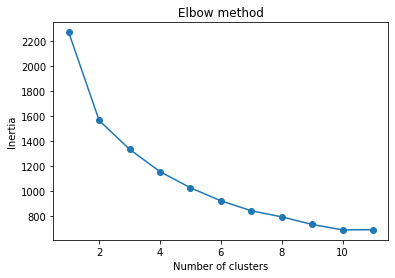

[[0.   2.86 1.7  3.39]
 [0.07 2.93 2.71 2.71]
 [0.31 2.47 2.21 2.15]
 [1.   2.87 1.64 3.27]]


,gambled_before,confidence_to_po,attitudes_to_gamble,attitudes_to_AU_gamble_management
0,1.0,2.8,2.000000,3.0
1,1.0,3.6,2.666667,3.5
3,0.0,2.8,1.666667,4.0
4,0.0,3.0,2.666667,2.5
5,0.0,3.0,2.666667,3.5


In [45]:
from sklearn.cluster import KMeans
# print(df_gambler_classification_study.head())
df_cluster = df_gamble_classification1
for column in df_cluster:
    df_cluster[column].replace(' ', np.nan, inplace=True)
    df_cluster[column].replace(-98, np.nan, inplace=True)
    df_cluster[column].replace(-99, np.nan, inplace=True)

df_cluster = df_cluster.dropna()
# https://stackoverflow.com/questions/31698861/add-column-to-the-end-of-pandas-dataframe-containing-average-of-previous-data
df_cluster = df_cluster.astype('float')
df_cluster['confidence_to_po'] = df_cluster[['Q9a','Q9b','Q9c','Q9d','Q9e']].mean(axis=1)
df_cluster['attitudes_to_gamble'] = df_cluster[['Q16c','Q16e', 'Q16h']].mean(axis=1)
df_cluster['attitudes_to_AU_gamble_management'] = df_cluster[['Q17a','Q17c']].mean(axis=1)
#Q16 a:p b:n c:n d:p e:n f:p g:p h:n
print(df_cluster)
df_cluster = df_cluster[['gambled_before', 'confidence_to_po', 'attitudes_to_gamble', 'attitudes_to_AU_gamble_management']]
df_cluster.to_csv('cluster_gamble.csv')
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_cluster)
    inertias.append(kmeans.inertia_)

kmeans.fit(df_cluster)#df_gambler_study
inertias.append(kmeans.inertia_)
plt.plot(range(1,12), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_cluster)
labels = kmeans.predict(df_cluster)
centroids = kmeans.cluster_centers_
centroid_labels = [centroids[i] for i in labels]
print(np.around(centroids, decimals=2)) # 可以给支持不支持的态度搞成一个column

# plt.scatter(x, y, c=kmeans.labels_)
# plt.show()
df_cluster.head()
#https://stackoverflow.com/questions/29314033/drop-rows-containing-empty-cells-from-a-pandas-dataframe